In [ ]:
import pandas as pd

# Load the flipkart.csv file
file_path = '//content/fipkart data set2.csv'
flipkart_data = pd.read_csv(file_path)

# Show the first few rows and the basic information about the dataset
flipkart_data_info = flipkart_data.info()
flipkart_data_head = flipkart_data.head()

flipkart_data_info, flipkart_data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    1020 non-null   int64 
 1   Product_name  1020 non-null   object
 2   Review        1020 non-null   object
 3   Rating        1020 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 32.0+ KB


(None,
    Unnamed: 0                                       Product_name  \
 0           0  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
 1           1  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
 2           2  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
 3           3  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   
 4           4  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   
 
                                               Review  Rating  
 0  Best under 60k Great performanceI got it for a...       5  
 1                                 Good perfomence...       5  
 2  Great performance but usually it has also that...       5  
 3           My wife is so happy and best product 👌🏻😘       5  
 4  Light weight laptop with new amazing features,...       5  )

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Dropping the 'Unnamed: 0' column as it is just an index
flipkart_data_cleaned = flipkart_data.drop(columns=['Unnamed: 0'])

# Extract features (Reviews) and labels (Ratings)
X = flipkart_data_cleaned['Review']
y = flipkart_data_cleaned['Rating']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Use TfidfVectorizer to convert text data (reviews) into numerical features
tfidf = TfidfVectorizer(max_features=1000)  # Limiting to 1000 features for now
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Check the shape of the transformed data
X_train_tfidf.shape, X_test_tfidf.shape


((816, 1000), (204, 1000))

In [ ]:
pip install graphviz


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the dataset
flipkart_data = pd.read_csv('/content/fipkart data set2.csv')
flipkart_data_cleaned = flipkart_data.drop(columns=['Unnamed: 0'])

# Extract reviews and ratings
X = flipkart_data_cleaned['Review']
y = flipkart_data_cleaned['Rating']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Convert text data into TF-IDF features
tfidf = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from keras.models import Sequential
from keras.layers import Dense

# Load and preprocess the dataset
flipkart_data = pd.read_csv('/content/fipkart data set2.csv')
flipkart_data_cleaned = flipkart_data.drop(columns=['Unnamed: 0'])
X = flipkart_data_cleaned['Review']
y = flipkart_data_cleaned['Rating']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Convert text data into TF-IDF features
tfidf = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Initialize a dictionary to store the accuracy scores
accuracy_scores = {}

# Logistic Regression
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train_tfidf, y_train)
y_pred_lr = lr_model.predict(X_test_tfidf)
accuracy_scores['Logistic Regression'] = accuracy_score(y_test, y_pred_lr)

# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
y_pred_nb = nb_model.predict(X_test_tfidf)
accuracy_scores['Naive Bayes'] = accuracy_score(y_test, y_pred_nb)

# Support Vector Machine (SVM)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)
y_pred_svm = svm_model.predict(X_test_tfidf)
accuracy_scores['SVM'] = accuracy_score(y_test, y_pred_svm)

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train_tfidf, y_train)
y_pred_knn = knn_model.predict(X_test_tfidf)
accuracy_scores['KNN'] = accuracy_score(y_test, y_pred_knn)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_tfidf, y_train)
y_pred_dt = dt_model.predict(X_test_tfidf)
accuracy_scores['Decision Tree'] = accuracy_score(y_test, y_pred_dt)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_tfidf, y_train)
y_pred_rf = rf_model.predict(X_test_tfidf)
accuracy_scores['Random Forest'] = accuracy_score(y_test, y_pred_rf)
# Adjust the target variable so that it ranges from 0 to 4

y_train_adjusted = y_train - 1
y_test_adjusted = y_test - 1

# XGBoost (for multi-class classification)
xgb_model = xgb.XGBClassifier(objective="multi:softmax", num_class=5, random_state=42)
xgb_model.fit(X_train_tfidf, y_train_adjusted)
y_pred_xgb = xgb_model.predict(X_test_tfidf)
accuracy_scores['XGBoost'] = accuracy_score(y_test_adjusted, y_pred_xgb)



# Neural Network
nn_model = Sequential()
nn_model.add(Dense(11, activation='relu', input_dim=1000))
nn_model.add(Dense(1, activation='sigmoid'))
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn_model.fit(X_train_tfidf, y_train, epochs=10, batch_size=32, verbose=1)

# Predict and calculate accuracy for Neural Network
y_pred_nn = nn_model.predict(X_test_tfidf)
y_pred_nn = [round(x[0]) for x in y_pred_nn]
accuracy_scores['Neural Network'] = accuracy_score(y_test, y_pred_nn)

# Print the accuracy scores for each classifier
for classifier, accuracy in accuracy_scores.items():
    print(f"The accuracy score for {classifier} is: {accuracy * 100:.2f}%")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0355 - loss: 0.4995
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0647 - loss: -0.4247
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0607 - loss: -1.5260
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0553 - loss: -2.8481 
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0498 - loss: -4.4572
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0633 - loss: -6.1285
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0574 - loss: -8.1235
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0684 - loss: -10.0344
Epoch 9/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0625 - loss: -12.6317
Epoch 10/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0565 - loss: -15.4806
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
The accuracy score for Logistic Regression is: 74.02%
The accuracy score for Naive Bayes is: 68.14%
The accu

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

# Load and preprocess the dataset
flipkart_data = pd.read_csv('/content/fipkart data set2.csv')
flipkart_data_cleaned = flipkart_data.drop(columns=['Unnamed: 0'])
X = flipkart_data_cleaned['Review']
y = flipkart_data_cleaned['Rating']  # Original labels (1 to 5)

# Split the dataset into training and testing sets (without stratification)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# Convert text data into TF-IDF features
tfidf = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Initialize a dictionary to store the evaluation metrics
evaluation_metrics = {}

# Function to compute metrics
def compute_metrics(y_true, y_pred, average='weighted'):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average=average, zero_division=0),
        'Recall': recall_score(y_true, y_pred, average=average, zero_division=0),
        'F1-Score': f1_score(y_true, y_pred, average=average, zero_division=0)
    }

# Logistic Regression
lr_model = LogisticRegression(max_iter=200, multi_class='multinomial', solver='lbfgs')
lr_model.fit(X_train_tfidf, y_train)
y_pred_lr = lr_model.predict(X_test_tfidf)
evaluation_metrics['Logistic Regression'] = compute_metrics(y_test, y_pred_lr)

# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
y_pred_nb = nb_model.predict(X_test_tfidf)
evaluation_metrics['Naive Bayes'] = compute_metrics(y_test, y_pred_nb)

# Support Vector Machine (SVM)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)
y_pred_svm = svm_model.predict(X_test_tfidf)
evaluation_metrics['SVM'] = compute_metrics(y_test, y_pred_svm)

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train_tfidf, y_train)
y_pred_knn = knn_model.predict(X_test_tfidf)
evaluation_metrics['KNN'] = compute_metrics(y_test, y_pred_knn)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_tfidf, y_train)
y_pred_dt = dt_model.predict(X_test_tfidf)
evaluation_metrics['Decision Tree'] = compute_metrics(y_test, y_pred_dt)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_tfidf, y_train)
y_pred_rf = rf_model.predict(X_test_tfidf)
evaluation_metrics['Random Forest'] = compute_metrics(y_test, y_pred_rf)

# XGBoost (for multi-class classification)
# Adjust labels for XGBoost
y_train_xgb = y_train - 1  # Convert to 0-4
y_test_xgb = y_test - 1    # Convert to 0-4

xgb_model = xgb.XGBClassifier(
    objective="multi:softmax",
    num_class=5,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)
xgb_model.fit(X_train_tfidf, y_train_xgb)
y_pred_xgb = xgb_model.predict(X_test_tfidf) + 1  # Convert back to 1-5
evaluation_metrics['XGBoost'] = compute_metrics(y_test, y_pred_xgb)

# Neural Network for Multi-Class Classification
# Define the number of classes
num_classes = len(np.unique(y))  # Should be 5

nn_model = Sequential()
nn_model.add(Dense(512, activation='relu', input_dim=X_train_tfidf.shape[1]))
nn_model.add(Dense(256, activation='relu'))
nn_model.add(Dense(num_classes, activation='softmax'))

nn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Adjust labels for Neural Network
y_train_nn = y_train - 1  # Convert to 0-4
y_test_nn = y_test - 1    # Convert to 0-4

# Train the Neural Network
nn_model.fit(
    X_train_tfidf,
    y_train_nn,
    epochs=20,
    batch_size=32,
    verbose=1,
    validation_split=0.1
)

# Predict and calculate metrics for Neural Network
y_pred_nn_probs = nn_model.predict(X_test_tfidf)
y_pred_nn = np.argmax(y_pred_nn_probs, axis=1) + 1  # Convert back to 1-5
evaluation_metrics['Neural Network'] = compute_metrics(y_test, y_pred_nn)

# Print the evaluation metrics for each classifier
for classifier, metrics in evaluation_metrics.items():
    print(f"\n{classifier} Metrics:")
    print(f"Accuracy : {metrics['Accuracy'] * 100:.2f}%")
    print(f"Precision: {metrics['Precision'] * 100:.2f}%")
    print(f"Recall   : {metrics['Recall'] * 100:.2f}%")
    print(f"F1-Score : {metrics['F1-Score'] * 100:.2f}%")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:23:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.5442 - loss: 1.3437 - val_accuracy: 0.6463 - val_loss: 0.9100
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6464 - loss: 0.8553 - val_accuracy: 0.6585 - val_loss: 0.8298
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7511 - loss: 0.6184 - val_accuracy: 0.6829 - val_loss: 0.7592
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8597 - loss: 0.3981 - val_accuracy: 0.7073 - val_loss: 0.8275
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9092 - loss: 0.2624 - val_accuracy: 0.7317 - val_loss: 0.8267
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9374 - loss: 0.1911 - val_accuracy: 0.7317 - val_loss: 0.9224
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9597 - loss: 0.1390 - val_accuracy: 0.7561 - val_loss: 0.9013
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9601 - loss: 0.1198 - val_accuracy: 0.7317 - val_loss: 0.

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:12:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


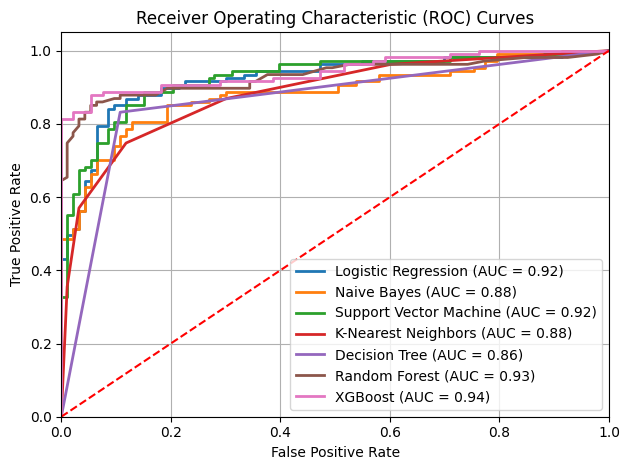

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Generate synthetic dataset for demonstration (replace with your dataset)
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define classifiers to evaluate
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Support Vector Machine": SVC(probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Initialize lists to store metrics
roc_auc_scores = {}
metrics = {}

# Train each classifier and compute ROC and metrics
for name, model in classifiers.items():
    # Train the model
    model.fit(X_train, y_train)

    # Get predicted probabilities for the positive class
    y_scores = model.predict_proba(X_test)[:, 1]

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)  # Calculate AUC
    roc_auc_scores[name] = roc_auc

    # Compute additional metrics
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store metrics
    metrics[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label='{} (AUC = {:.2f})'.format(name, roc_auc))

# Plotting details
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# Display metrics for each classifier
for name, metric in metrics.items():
    print(f"{name}:")
    print(f"  Accuracy: {metric['Accuracy'] * 100:.2f}%")
    print(f"  Precision: {metric['Precision'] * 100:.2f}%")
    print(f"  Recall: {metric['Recall'] * 100:.2f}%")
    print(f"  F1 Score: {metric['F1 Score'] * 100:.2f}%\n")


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# ... (your existing code to train and predict using Logistic Regression) ...

# Assuming y_test and y_pred_lr contain the true and predicted ratings
# Filter for rating 5 (adjust if needed for other ratings)
y_test_5 = (y_test == 5)
y_pred_5 = (y_pred_lr == 5)

precision = precision_score(y_test_5, y_pred_5)
recall = recall_score(y_test_5, y_pred_5)
f1 = f1_score(y_test_5, y_pred_5)

print(f"Precision for rating 5: {precision}")
print(f"Recall for rating 5: {recall}")
print(f"F1 Score for rating 5: {f1}")

Precision for rating 5: 0.7455621301775148
Recall for rating 5: 0.9473684210526315
F1 Score for rating 5: 0.8344370860927153


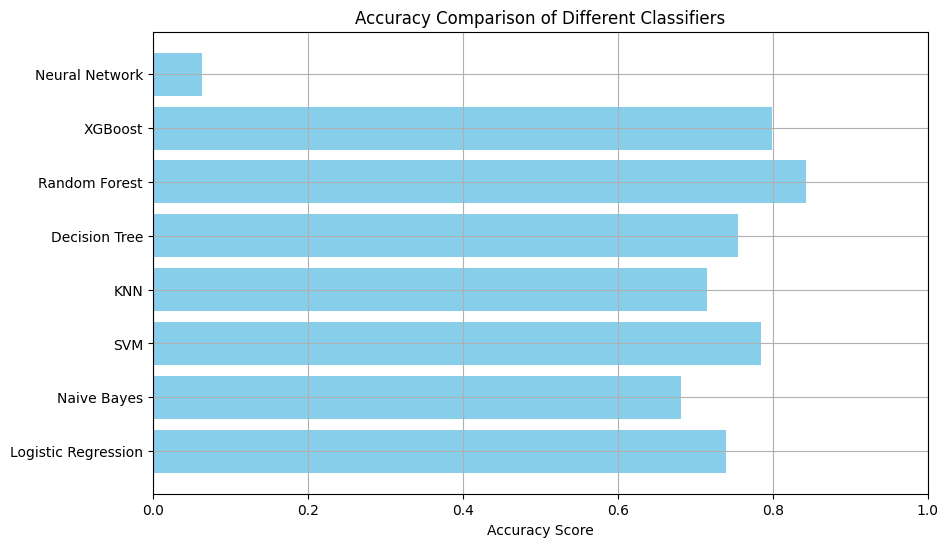

In [ ]:
import matplotlib.pyplot as plt

# Classifiers and their accuracy scores
classifiers = list(accuracy_scores.keys())
accuracies = list(accuracy_scores.values())

# Plotting the accuracy scores of each classifier
plt.figure(figsize=(10, 6))
plt.barh(classifiers, accuracies, color='skyblue')
plt.xlabel('Accuracy Score')
plt.title('Accuracy Comparison of Different Classifiers')
plt.xlim([0, 1])  # Set x-axis limit between 0 and 1 (as accuracy is a percentage)
plt.grid(True)

# Display the plot
plt.show()


Accuracy: 95.59%
Precision: 95.80%
Recall: 95.59%
F1 Score: 94.97%

Classification Report:
               precision    recall  f1-score   support

    Negative       1.00      0.85      0.92        13
     Neutral       1.00      0.46      0.63        13
    Positive       0.95      1.00      0.98       178

    accuracy                           0.96       204
   macro avg       0.98      0.77      0.84       204
weighted avg       0.96      0.96      0.95       204



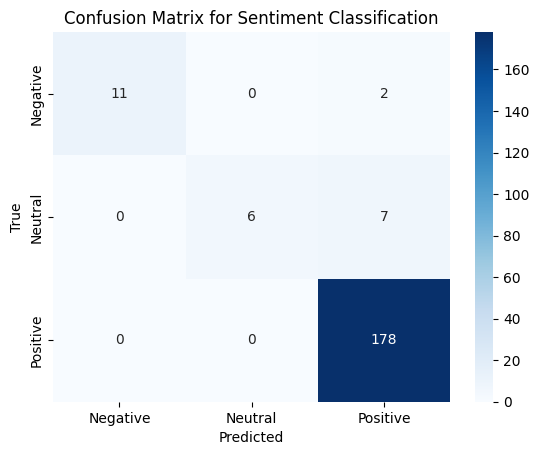


Sentiment Distribution:
Positive: 91.67%
Neutral: 2.94%
Negative: 5.39%


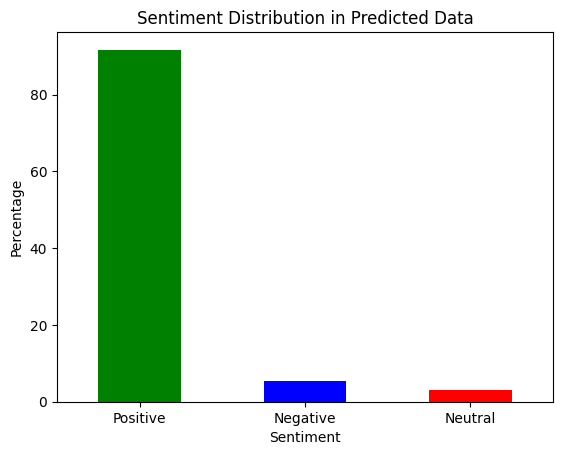

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, confusion_matrix

# Load and preprocess the dataset
flipkart_data = pd.read_csv('/content/fipkart data set2.csv')
flipkart_data_cleaned = flipkart_data.drop(columns=['Unnamed: 0'])

# Convert Ratings to Sentiments: 1-2 as 'Negative', 3 as 'Neutral', 4-5 as 'Positive'
def rating_to_sentiment(rating):
    if rating <= 2:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Positive'

# Apply the function to create the 'Sentiment' column
flipkart_data_cleaned['Sentiment'] = flipkart_data_cleaned['Rating'].apply(rating_to_sentiment)

# Extract features (Reviews) and labels (Sentiment)
X = flipkart_data_cleaned['Review']
y = flipkart_data_cleaned['Sentiment']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Convert text data into TF-IDF features
tfidf = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

# Predict sentiments on the test set
y_pred_rf = rf_model.predict(X_test_tfidf)

# Performance Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred_rf)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_rf, average='weighted')
report = classification_report(y_test, y_pred_rf, target_names=['Negative', 'Neutral', 'Positive'])

# Output performance metrics
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))
print("\nClassification Report:\n", report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title("Confusion Matrix for Sentiment Classification")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Calculating Sentiment Distribution
sentiment_counts = pd.Series(y_pred_rf).value_counts(normalize=True) * 100
print("\nSentiment Distribution:")
print("Positive: {:.2f}%".format(sentiment_counts.get('Positive', 0)))
print("Neutral: {:.2f}%".format(sentiment_counts.get('Neutral', 0)))
print("Negative: {:.2f}%".format(sentiment_counts.get('Negative', 0)))

# Bar plot for Sentiment Distribution
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title("Sentiment Distribution in Predicted Data")
plt.xlabel("Sentiment")
plt.ylabel("Percentage")
plt.xticks(rotation=0)
plt.show()


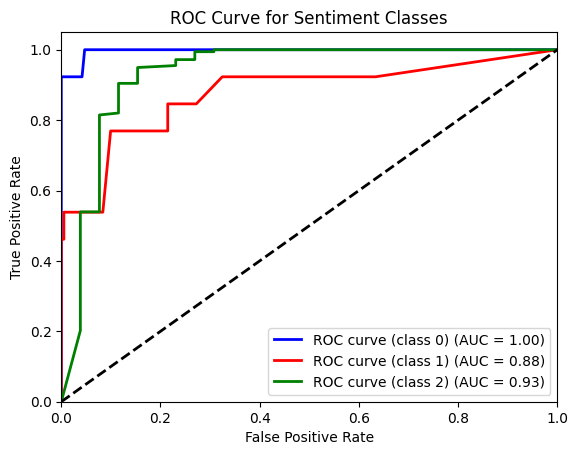

Overall AUC Score: 0.93


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
import seaborn as sns

# Load and preprocess the dataset
flipkart_data = pd.read_csv('/content/fipkart data set2.csv')
flipkart_data_cleaned = flipkart_data.drop(columns=['Unnamed: 0'])

# Convert Ratings to Sentiments: 1-2 as 'Negative', 3 as 'Neutral', 4-5 as 'Positive'
def rating_to_sentiment(rating):
    if rating <= 2:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Positive'

# Apply the function to create the 'Sentiment' column
flipkart_data_cleaned['Sentiment'] = flipkart_data_cleaned['Rating'].apply(rating_to_sentiment)

# Extract features (Reviews) and labels (Sentiment)
X = flipkart_data_cleaned['Review']
y = flipkart_data_cleaned['Sentiment']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Binarize the output for multiclass ROC
y_binarized = label_binarize(y_test, classes=['Negative', 'Neutral', 'Positive']) # Binarize the test labels
n_classes = y_binarized.shape[1]

# Convert text data into TF-IDF features
tfidf = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

# Predict probabilities for the test set for ROC
y_score = rf_model.predict_proba(X_test_tfidf)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
for i, color in zip(range(n_classes), ['blue', 'red', 'green']):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (class {}) (AUC = {:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Sentiment Classes')
plt.legend(loc="lower right")
plt.show()

# Calculate overall AUC score (weighted average of each class)
overall_auc = roc_auc_score(y_binarized, y_score, average="weighted")
print(f"Overall AUC Score: {overall_auc:.2f}")

# Box Plot for Sentiment Classes
sentiment_features = pd.DataFrame(X_test_tfidf.toarray(), columns=tfidf.get_feature_names_out()) # Use the correct variable name 'tfidf'